In [138]:
%matplotlib inline
from __future__ import division, print_function
from itertools import product as cproduct
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pprint import pprint

import cam_api as api
import fluorescence as fl

In [100]:
WINDOW_LEN = 60  # s

CAM_DIR_PATH = '/Volumes/Brain2015/CAM/'
N_CELLS_RAW_PLOT = 3
SPACING_VERTICAL = 300
COLORS_TF = {1: 'k', 2: 'b', 4: 'c', 8: 'g', 15: 'r', np.nan: 'k'}

In [56]:
expt_ids = os.walk(CAM_DIR_PATH).next()[1]
expt_paths = [os.path.join(CAM_DIR_PATH, expt_id) for expt_id in expt_ids]
nwb_paths = [os.path.join(expt_path, expt_id + '.nwb') for expt_path, expt_id in zip(expt_paths, expt_ids)]
pprint(nwb_paths)

['/Volumes/Brain2015/CAM/479182359/479182359.nwb',
 '/Volumes/Brain2015/CAM/479214697/479214697.nwb',
 '/Volumes/Brain2015/CAM/479681980/479681980.nwb',
 '/Volumes/Brain2015/CAM/479720699/479720699.nwb',
 '/Volumes/Brain2015/CAM/479995614/479995614.nwb',
 '/Volumes/Brain2015/CAM/480152974/480152974.nwb',
 '/Volumes/Brain2015/CAM/482591434/482591434.nwb',
 '/Volumes/Brain2015/CAM/482923718/482923718.nwb',
 '/Volumes/Brain2015/CAM/482924833/482924833.nwb',
 '/Volumes/Brain2015/CAM/483020038/483020038.nwb',
 '/Volumes/Brain2015/CAM/483020476/483020476.nwb',
 '/Volumes/Brain2015/CAM/483056972/483056972.nwb',
 '/Volumes/Brain2015/CAM/483059231/483059231.nwb',
 '/Volumes/Brain2015/CAM/483061828/483061828.nwb',
 '/Volumes/Brain2015/CAM/483155697/483155697.nwb',
 '/Volumes/Brain2015/CAM/483156495/483156495.nwb',
 '/Volumes/Brain2015/CAM/484446004/484446004.nwb',
 '/Volumes/Brain2015/CAM/484561214/484561214.nwb',
 '/Volumes/Brain2015/CAM/484565225/484565225.nwb',
 '/Volumes/Brain2015/CAM/484571

In [57]:
# Load an experiment
nwb_path = nwb_paths[0]
stim_data = api.getStimulusTable(nwb_path)
meta_data = api.getMetaData(nwb_path)
time_vec, traces_raw = api.getFluorescenceTraces(nwb_path)

In [86]:
print('meta_data:', meta_data)
print('stim_table:')
stim_data.head(600)

meta_data: {'lims_id': '479182359', 'HVA': 'V1', 'specimen': '169227', 'system': '2p1', 'depth': '400', 'Cre': 'Emx1'}
stim_table:


,start,end,temporal_frequency,orientation,blank_sweep
0,267,327,4,135,0
1,357,417,1,225,0
2,448,508,4,0,0
3,538,598,4,180,0
4,629,689,4,90,0
5,719,779,2,45,0
6,810,870,4,45,0
7,900,960,1,270,0
8,991,1051,1,180,0
9,1081,1141,NaN,NaN,1


In [59]:
stim_data.

[267.0,
 357.0,
 448.0,
 538.0,
 629.0,
 719.0,
 810.0,
 900.0,
 991.0,
 1081.0,
 1172.0,
 1262.0,
 1353.0,
 1443.0,
 1534.0,
 1624.0,
 1715.0,
 1805.0,
 1896.0,
 1986.0,
 2077.0,
 2167.0,
 2258.0,
 2348.0,
 2439.0,
 2529.0,
 2620.0,
 2710.0,
 2801.0,
 2891.0,
 2982.0,
 3072.0,
 3163.0,
 3253.0,
 3344.0,
 3434.0,
 3525.0,
 3615.0,
 3706.0,
 3796.0,
 3887.0,
 3977.0,
 4068.0,
 4158.0,
 4249.0,
 4339.0,
 4430.0,
 4520.0,
 4611.0,
 4701.0,
 4792.0,
 4882.0,
 4973.0,
 5063.0,
 5154.0,
 5244.0,
 5334.0,
 5425.0,
 5515.0,
 5606.0,
 5696.0,
 5787.0,
 5877.0,
 5968.0,
 6058.0,
 6149.0,
 6239.0,
 6330.0,
 6420.0,
 6511.0,
 6601.0,
 6692.0,
 6782.0,
 6873.0,
 6963.0,
 7054.0,
 7144.0,
 7235.0,
 7325.0,
 7416.0,
 7506.0,
 7597.0,
 7687.0,
 7778.0,
 7868.0,
 7959.0,
 8049.0,
 8140.0,
 8230.0,
 8321.0,
 8411.0,
 8502.0,
 8592.0,
 8683.0,
 8773.0,
 8864.0,
 8954.0,
 9045.0,
 9135.0,
 9226.0,
 9316.0,
 9407.0,
 9497.0,
 9588.0,
 9678.0,
 9769.0,
 9859.0,
 9950.0,
 10040.0,
 10131.0,
 10221.0,
 10312.

In [5]:
n_cells, n_tps = traces_raw.shape

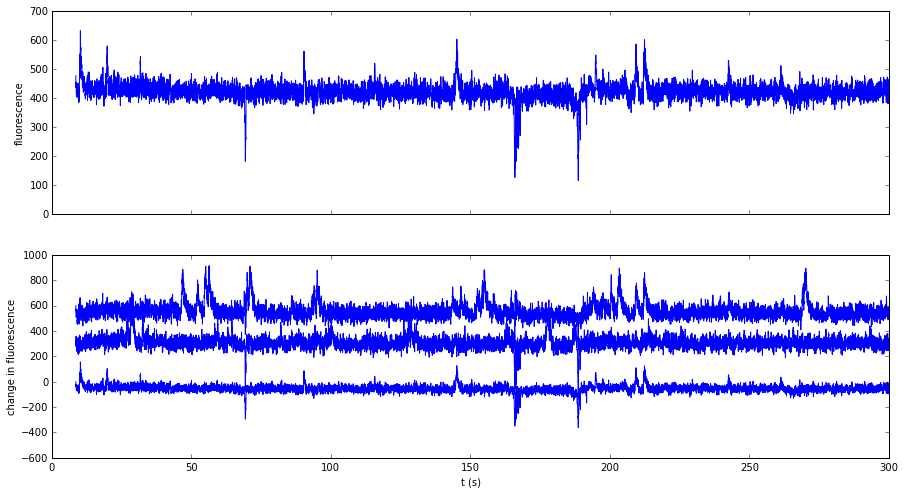

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15,8), sharex=True)
axs[0].plot(time_vec, traces_raw[0])

for cell_ctr in range(N_CELLS_RAW_PLOT):
    axs[1].plot(time_vec, traces_raw[cell_ctr] - traces_raw[cell_ctr][0] + SPACING_VERTICAL*cell_ctr, 'b')
    
axs[1].set_xlim(0, 300)
axs[1].set_xlabel('t (s)')
axs[0].set_ylabel('fluorescence')
axs[1].set_ylabel('change in fluorescence')

In [125]:
windowed_mean = fl.windowed_mean(traces_raw, window_len=30*WINDOW_LEN)
traces = (traces_raw - windowed_mean) / windowed_mean
for trace in traces:
    trace /= np.abs(trace).max()

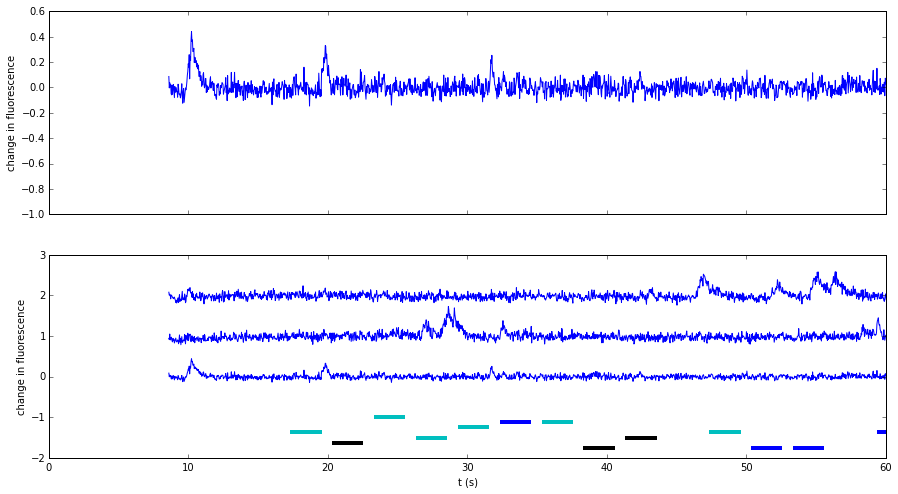

In [87]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
axs[0].plot(time_vec, traces[0])

for cell_ctr in range(N_CELLS_RAW_PLOT):
    axs[1].plot(time_vec, traces[cell_ctr] + cell_ctr, 'b')
    
for _, stim in stim_data.iterrows():
    t = time_vec[stim['start']:stim['end']]
    if not np.isnan(stim['temporal_frequency']):
        color = COLORS_TF[int(stim['temporal_frequency'])]
    else:
        color = COLORS_TF[np.nan]
    axs[1].plot(t, -np.ones(t.shape) - stim['orientation']/360, color=color, lw=4)
    
axs[1].set_xlim(0, 60)
axs[1].set_ylim(-2, 3)
axs[1].set_xlabel('t (s)')
axs[0].set_ylabel('change in fluorescence')
axs[1].set_ylabel('change in fluorescence')

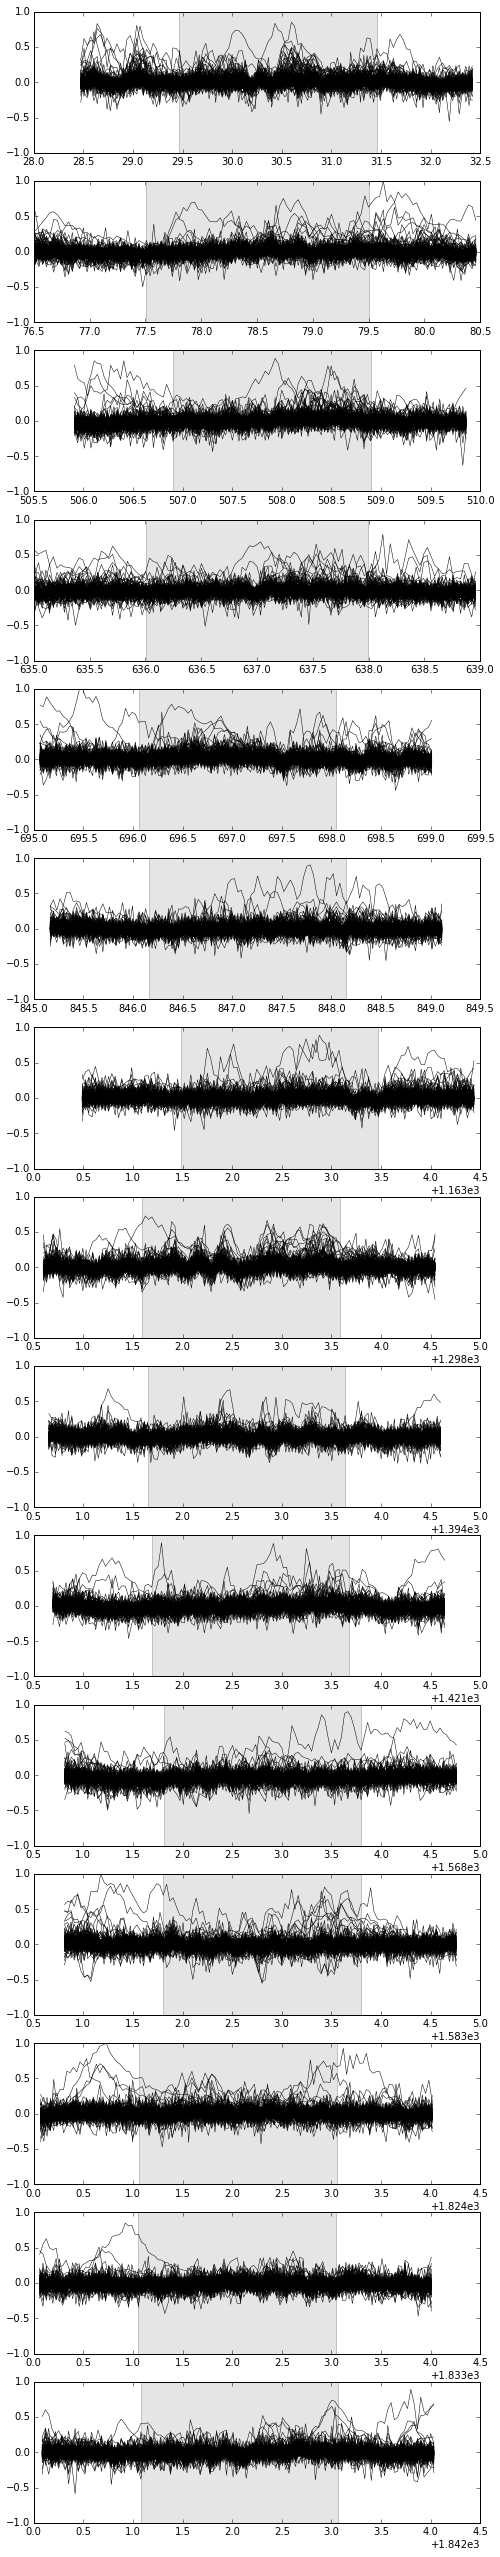

In [152]:
# find all trials with specific conditions
tf = 4
ori = 90
mask_tf = stim_data['temporal_frequency'] == tf
mask_ori = stim_data['orientation'] == ori
idxs = list(stim_data[mask_tf & mask_ori].index)

fig, axs = plt.subplots(len(idxs), 1, figsize=(8, len(idxs)*3))
for idx, ax in zip(idxs, axs):
    stim = stim_data.loc[idx]
    if idx > 0:
        start = max(stim_data.loc[idx - 1]['end'], stim.start - 30)
    else:
        start = max(0, stim.start - 30)
    end = stim.end + 30
    t = time_vec[start:end]
    ax.plot(t, traces[:, start:end].T, lw=0.5, c='k')
    ax.axvspan(time_vec[stim.start], time_vec[stim.end], facecolor='gray', alpha=0.2)
    
    ax.set_ylim(-1, 1)

In [153]:
# get all neurons that were active during stimulus
threshold_activity = 0.4
active_neurons = []
for idx in idxs:
    stim = stim_data.loc[idx]
    trial = traces[:, stim.start:stim.end]
    condition = (trial.max(axis=1) > threshold_activity) & (trial[:, 0] < threshold_activity)
    active_neurons.append(np.nonzero(condition)[0])

# get overlap matrix
overlap = np.zeros((len(idxs), len(idxs)), dtype=int)
for row, col in cproduct(range(len(idxs)), range(len(idxs))):
    overlap[row, col] = len(set(active_neurons[row]).intersection(set(active_neurons[col])))

print(overlap)

[[17  3  6  2  7  2  1  8  2  3  1  2  4  0  3]
 [ 3 11  4  3  4  2  2  5  1  2  2  2  3  0  2]
 [ 6  4 12  4  7  4  4  9  3  5  2  2  5  1  2]
 [ 2  3  4 11  4  2  2  3  3  3  2  2  3  0  1]
 [ 7  4  7  4 12  4  3  9  4  5  2  2  5  1  3]
 [ 2  2  4  2  4  5  3  4  2  3  2  2  3  1  0]
 [ 1  2  4  2  3  3  6  4  1  3  2  3  2  1  0]
 [ 8  5  9  3  9  4  4 19  3  5  2  3  5  1  2]
 [ 2  1  3  3  4  2  1  3  7  3  0  1  3  0  1]
 [ 3  2  5  3  5  3  3  5  3 10  2  2  4  1  2]
 [ 1  2  2  2  2  2  2  2  0  2  4  1  1  1  0]
 [ 2  2  2  2  2  2  3  3  1  2  1  7  2  0  1]
 [ 4  3  5  3  5  3  2  5  3  4  1  2 10  0  3]
 [ 0  0  1  0  1  1  1  1  0  1  1  0  0  1  0]
 [ 3  2  2  1  3  0  0  2  1  2  0  1  3  0  8]]


In [130]:
(np.array([False, True, True, False]) & np.array([True, True, True, False])).nonzero()[0]

array([1, 2])

In [132]:
np.nonzero((np.array([False, True, True, False]) & np.array([True, True, True, False])))[0]

array([1, 2])

In [137]:
list(cproduct([1, 2, 3], ['a', 'b', 'c']))

[(1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c'),
 (3, 'a'),
 (3, 'b'),
 (3, 'c')]

In [143]:
set([4,2,3]).intersection(set([4, 6, 9]))

{4}

In [144]:
{4, 2, 3}.intersection({4, 5, 9})

{4}